┌ Info: Saved animation to 
│   fn = /data/GitHub/mine/maths/julia-scripts/Chaos/Rossler/tmp.gif
└ @ Plots /home/fusion809/.julia/packages/Plots/ZVLhV/src/animation.jl:104


Plots.AnimatedGif("/data/GitHub/mine/maths/julia-scripts/Chaos/Rossler/tmp.gif")
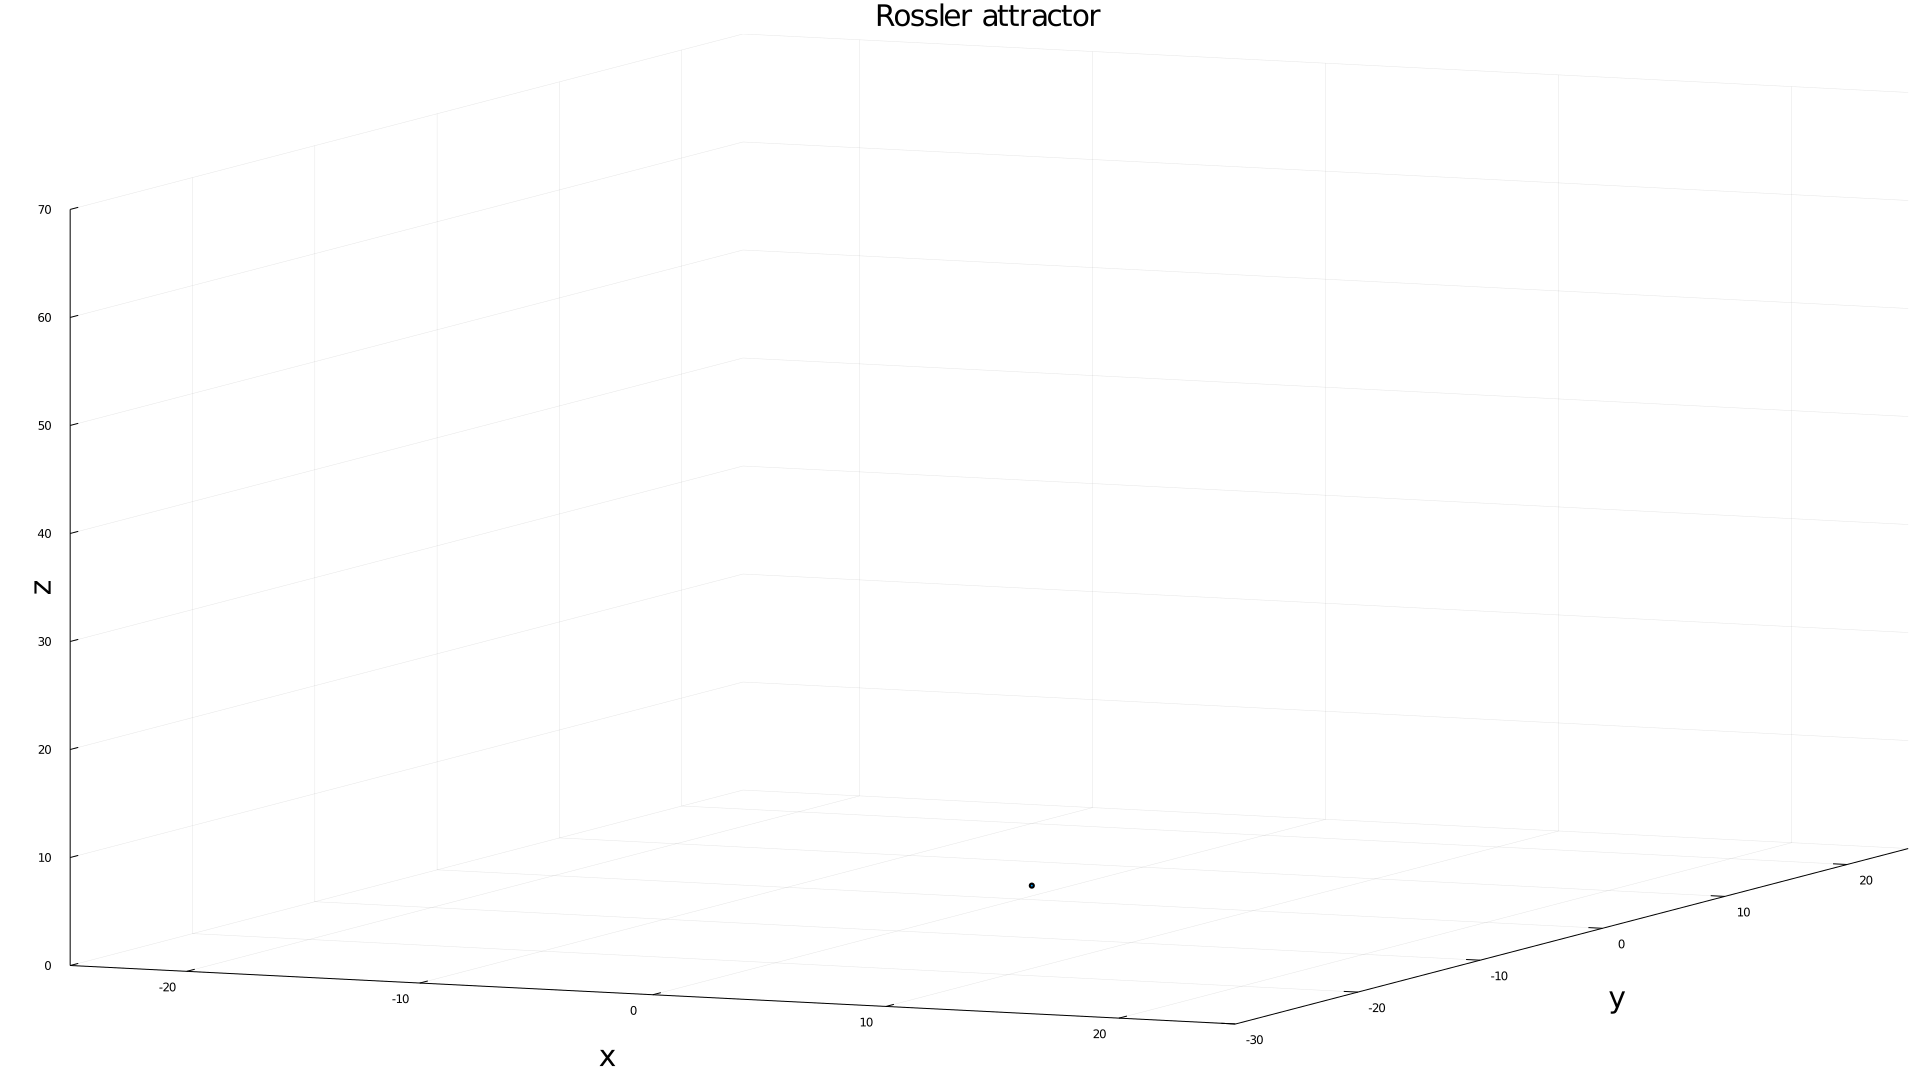

In [5]:
using Plots;
mutable struct Rossler
    dt; a; b; c; x; y; z
end

# Equation of the Rossler attractor
function rossler(a,b,c,x,y,z)
    dx_dt  = -y-z;
    dy_dt  = x+a*y;
    dz_dt  = b+z*(x-c);
    
    return dx_dt, dy_dt, dz_dt
end

# RK4 integrator
function RK4(a,b,c,dt,x,y,z)
    K1     = dt.*rossler(a,b,c,x,y,z);
    k1     = K1[1];
    l1     = K1[2];
    m1     = K1[3];
    K2     = dt.*rossler(a,b,c,x+k1/2,y+l1/2,z+m1/2);
    k2     = K2[1];
    l2     = K2[2];
    m2     = K2[3];
    K3     = dt.*rossler(a,b,c,x+k2/2,y+l2/2,z+m2/2);
    k3     = K3[1];
    l3     = K3[2];
    m3     = K3[3];
    K4     = dt.*rossler(a,b,c,x+k3,y+l3,z+m3);
    k4     = K4[1];
    l4     = K4[2];
    m4     = K4[3];
    
    dx     = 1/6*(k1+2*k2+2*k3+k4);
    dy     = 1/6*(l1+2*l2+2*l3+l4);
    dz     = 1/6*(m1+2*m2+2*m3+m4);
    return dx, dy, dz
end

function step!(l::Rossler)
    diff = RK4(l.a,l.b,l.c,l.dt,l.x,l.y,l.z);
    l.x += diff[1];
    l.y += diff[2];
    l.z += diff[3];
end

N  = 1e5;
N  = convert(Int64, N);
t0 = 0;
tf = 400;
h  = (tf-t0)/N;

attractor = Rossler((dt = h, a = 0.1, b = 0.1, c = 14, x = 0., 
        y = 1., z = 1.)...)

# initialize a 3D plot with 1 empty series
plt = plot3d(1, xlim=(-25,25), ylim=(-30,25), zlim=(0,70),
                title = "Rossler attractor", titlefontsize = 20,
                marker = 3,
                legendfontsize = 20,
                guidefontsize = 20,
                xlabel="x",
                ylabel="y",
                zlabel="z",
                size=(1920, 1080),
                label="")

# build an animated gif by pushing new points to the plot, 
# saving every 60th frame
@gif for i=1:N
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 60

In [2]:
25000/15

1666.6666666666667

In [3]:
1e5/ans

60.0